<a href="https://colab.research.google.com/github/rishabh3562/DA/blob/main/colab/reddit_post_data_scrapping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install praw asyncpraw pymongo pandas motor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 189.3/189.3 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.4/196.4 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.6/313.6 kB 8.7 MB/s eta 0:00:00


In [5]:
import asyncio
import nest_asyncio

nest_asyncio.apply()  # Apply fix once

async def run_async(coro):
    """Runs an async function properly in both normal and Colab environments."""
    loop = asyncio.get_event_loop()
    if loop.is_running():
        return await coro  # ✅ Await directly in Colab
    else:
        return asyncio.run(coro)  # Normal execution


In [6]:
import praw
from google.colab import userdata

In [7]:
client_id = userdata.get("reddit_client_id")
assert client_id is not None
client_secret = userdata.get("reddit_client_secret")
assert client_secret is not None
username = userdata.get("reddit_username")
assert username is not None
password = userdata.get("reddit_password")
assert password is not None
app_name = userdata.get("reddit_app")
reddit = praw.Reddit(client_id=client_id,
                     client_secret=client_secret,
                     user_agent=app_name,
                     username=username, \
                     password=password)


In [8]:
def test(username):
  comms = list(reddit.redditor(username).comments.new(limit=5))
  return comms[0].body

In [9]:
test("thisisbillgates")

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



'Source Code is the story of everything that led up to the creation of Microsoft. But it’s also a book about not fitting in, sneaking out, playing cards, hiking mountains, and forming friendships that changed my life. I’m excited for you to read it: [https://gatesnot.es/4gqOmbQ](https://gatesnot.es/4gqOmbQ)'

In [7]:
print(reddit.user.me())  # Should return your Reddit username if authenticated


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Top_Marsupial_1135


In [ ]:
import asyncpraw
import nest_asyncio
import asyncio

nest_asyncio.apply()  # Fix for Google Colab

async def main():
    reddit = asyncpraw.Reddit(
        client_id=userdata.get("reddit_client_id"),
        client_secret=userdata.get("reddit_client_secret"),
        user_agent=userdata.get("reddit_app"),
        username=userdata.get("reddit_username"),
        password=userdata.get("reddit_password"),
    )

    user = await reddit.user.me()  # Async call
    print(f"Logged in as: {user}")

asyncio.get_event_loop().run_until_complete(main())  # Run async function in Colab


Logged in as: Top_Marsupial_1135


In [ ]:
import asyncpraw

async def main():
    reddit = asyncpraw.Reddit(
        client_id=userdata.get("reddit_client_id"),
        client_secret=userdata.get("reddit_client_secret"),
        user_agent=userdata.get("reddit_app"),
        username=userdata.get("reddit_username"),
        password=userdata.get("reddit_password"),
    )
    user = await reddit.user.me()
    print(f"Logged in as: {user}")

await run_async(main())  # ✅ Works properly in Colab


ERROR:asyncio:Unclosed client session
client_session: <aiohttp.client.ClientSession object at 0x7d7054c55a10>
ERROR:asyncio:Unclosed connector
connections: ['deque([(<aiohttp.client_proto.ResponseHandler object at 0x7d704d6cf1c0>, 449.626659105)])']
connector: <aiohttp.connector.TCPConnector object at 0x7d7054c57d10>


Logged in as: Top_Marsupial_1135


In [10]:
from motor.motor_asyncio import AsyncIOMotorClient

async def connect_mongo(uri: str, db_name: str):
    """Connect to MongoDB and return the database instance."""
    client = AsyncIOMotorClient(uri)
    return client[db_name]  # Return database instance
async def test_mongo_connection(db):
    """Check if MongoDB connection is successful."""
    try:
        await db.command("ping")  # Send a ping to MongoDB
        print("✅ MongoDB connection successful!")
    except Exception as e:
        print(f"❌ MongoDB connection failed: {e}")


In [11]:
import asyncio

MONGO_URI = userdata.get("MONGO_URI")
if not MONGO_URI:
    raise ValueError("MONGO_URI is not set")

DB_NAME = "mydatabase"

async def main():
    db = await connect_mongo(MONGO_URI, DB_NAME)
    await test_mongo_connection(db)  # Test connection

await run_async(main())


✅ MongoDB connection successful!


In [10]:
import asyncpraw

async def scrape_reddit(subreddit_name, query, limit=50):
    """Scrape Reddit for posts related to the given query and close the session properly."""
    reddit = asyncpraw.Reddit(
        client_id=userdata.get("reddit_client_id"),
        client_secret=userdata.get("reddit_client_secret"),
        user_agent=userdata.get("reddit_app"),
        username=userdata.get("reddit_username"),
        password=userdata.get("reddit_password"),
    )

    subreddit = await reddit.subreddit(subreddit_name)
    posts = []

    try:
        async for post in subreddit.search(query, limit=limit):
            posts.append({
                "title": post.title,
                "selftext": post.selftext,
                "score": post.score,
                "num_comments": post.num_comments,
                "url": post.url,
                "created_utc": post.created_utc,
                "query": query
            })
    except Exception as e:
        print(f"⚠️ Error scraping {query}: {e}")

    await reddit.close()  # ✅ Explicitly close the Reddit client
    return posts



In [12]:
async def save_to_mongo(db, collection_name, data):
    """Save scraped data into MongoDB."""
    collection = db[collection_name]
    if data:
        await collection.insert_many(data)
        print(f"✅ Inserted {len(data)} records into {collection_name}")
    else:
        print("⚠️ No data to insert!")


In [ ]:
MONGO_URI = userdata.get("MONGO_URI")
if not MONGO_URI:
    raise ValueError("MONGO_URI is not set")
DB_NAME = "reddit_sentiments"

async def main():
    db = await connect_mongo(MONGO_URI, DB_NAME)

    ai_queries = ["DeepSeek AI", "ChatGPT", "Claude AI", "Gemini AI"]
    for ai in ai_queries:
        print(f"🔍 Scraping Reddit for: {ai}")
        posts = await scrape_reddit("all", ai, limit=500)  # ✅ Use "all" instead of a specific subreddit
        await save_to_mongo(db, "reddit_posts", posts)

    print("✅ All data scraped & saved!")

await run_async(main())



🔍 Scraping Reddit for: DeepSeek AI
✅ Inserted 250 records into reddit_posts
🔍 Scraping Reddit for: ChatGPT
✅ Inserted 241 records into reddit_posts
🔍 Scraping Reddit for: Claude AI
✅ Inserted 243 records into reddit_posts
🔍 Scraping Reddit for: Gemini AI
✅ Inserted 245 records into reddit_posts
✅ All data scraped & saved!


In [13]:
import pandas as pd
from motor.motor_asyncio import AsyncIOMotorClient
MONGO_URI = userdata.get("MONGO_URI")
if not MONGO_URI:
    raise ValueError("MONGO_URI is not set")
DB_NAME = "reddit_sentiments"
COLLECTION_NAME = "reddit_posts"

async def load_data_from_mongo():
    """Load data from MongoDB into a Pandas DataFrame."""
    client = AsyncIOMotorClient(MONGO_URI)
    db = client[DB_NAME]
    collection = db[COLLECTION_NAME]

    cursor = collection.find()  # Get all documents
    data = await cursor.to_list(length=None)  # Convert to list

    df = pd.DataFrame(data)  # Convert to DataFrame
    return df

df = await load_data_from_mongo()
df.head()  # Display first 5 rows


,_id,title,selftext,score,num_comments,url,created_utc,query
0,67a5f65168b42800b8dbf1ec,How China’s new AI model DeepSeek is threateni...,,3912,661,https://www.cnbc.com/2025/01/24/how-chinas-new...,1.737854e+09,DeepSeek AI
1,67a5f65168b42800b8dbf1ed,Deepseek claims they beat OpenAI's 01 model on...,"Did anyone see this article about Deepseek, a ...",308,180,https://www.reddit.com/r/OpenAI/comments/1hqji...,1.735666e+09,DeepSeek AI
2,67a5f65168b42800b8dbf1ee,Billionaire and Scale AI CEO Alexandr Wang: De...,,1449,506,https://v.redd.it/pm2ecj3niyee1,1.737731e+09,DeepSeek AI
3,67a5f65168b42800b8dbf1ef,Meta AI in panic mode as free open-source Deep...,,17563,1214,https://techstartups.com/2025/01/24/meta-ai-in...,1.737940e+09,DeepSeek AI
4,67a5f65168b42800b8dbf1f0,Latest Chinese AI,🤓,3241,820,https://www.reddit.com/gallery/1ho7oi4,1.735399e+09,DeepSeek AI


NameError: name '_df_12' is not defined

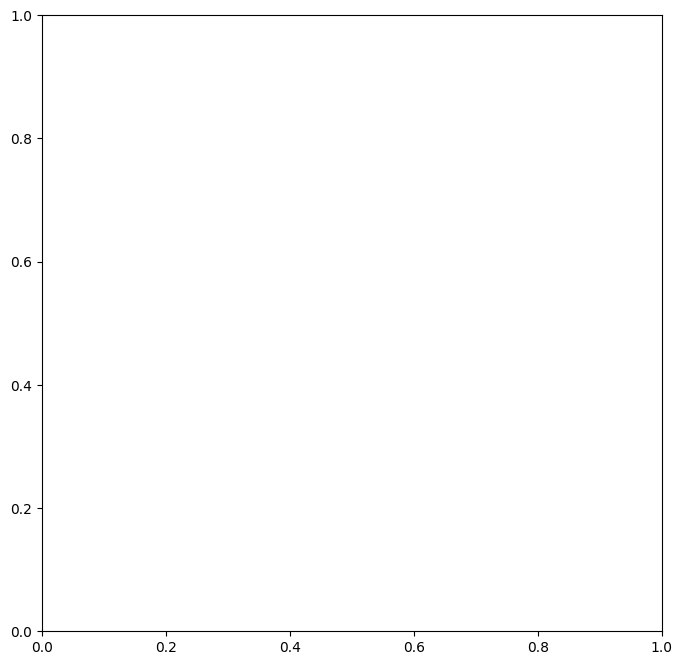

In [14]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['title'].value_counts()
    for x_label, grp in _df_12.groupby('_id')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('_id')
_ = plt.ylabel('title')

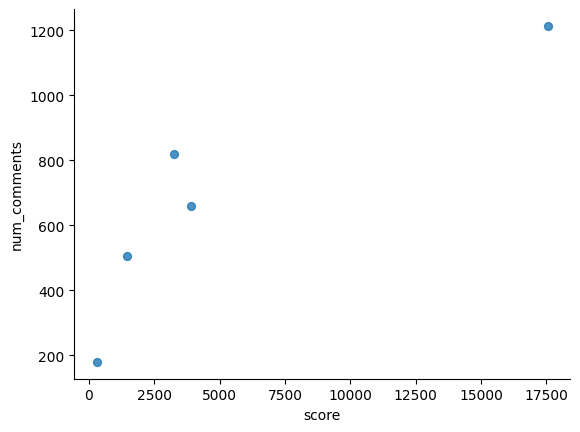

In [ ]:
from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='score', y='num_comments', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

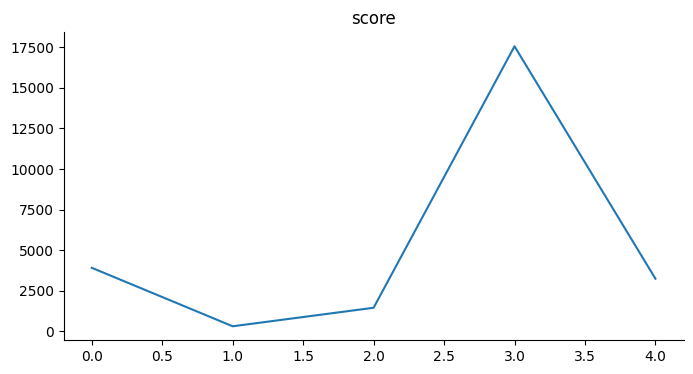

In [ ]:
from matplotlib import pyplot as plt
_df_9['score'].plot(kind='line', figsize=(8, 4), title='score')
plt.gca().spines[['top', 'right']].set_visible(False)

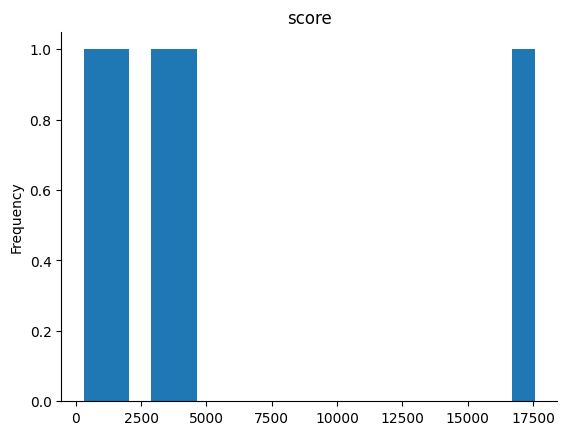

In [ ]:
from matplotlib import pyplot as plt
_df_0['score'].plot(kind='hist', bins=20, title='score')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [15]:
df.describe()

,score,num_comments,created_utc
count,3337.000000,3337.000000,3.337000e+03
mean,3893.586755,392.946359,1.724045e+09
std,7789.448229,666.048369,1.734825e+07
min,0.000000,1.000000,1.659108e+09
25%,195.000000,68.000000,1.711295e+09
50%,768.000000,165.000000,1.731933e+09
75%,3853.000000,458.000000,1.737984e+09
max,67645.000000,8933.000000,1.738926e+09


In [16]:
import pandas as pd
import torch
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from transformers import pipeline

# Load Data
data = df  # Ensure df is defined before this

# Initialize Sentiment Tools
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# Use GPU if available
device = 0 if torch.cuda.is_available() else -1

# Optimized Longformer Pipeline
longformer_sentiment = pipeline(
    "sentiment-analysis",
    model="allenai/longformer-base-4096",
    device=device,  # Enable GPU if available
    torch_dtype=torch.float16 if torch.cuda.is_available() else torch.float32  # Use FP16 for efficiency
)

# VADER for short texts (Titles)
data["vader_sentiment"] = data["title"].apply(lambda x: sia.polarity_scores(str(x))["compound"])

# Longformer for long texts (Selftext) with batch processing
def analyze_long_texts(texts):
    processed_texts = [text[:4096] if isinstance(text, str) and len(text) > 10 else "NEUTRAL" for text in texts]
    results = longformer_sentiment(processed_texts, batch_size=16)  # Adjust batch size based on VRAM
    return [r["label"] if r != "NEUTRAL" else "NEUTRAL" for r in results]

data["longformer_sentiment"] = analyze_long_texts(data["selftext"].tolist())

# Use Title Sentiment for Empty Selftext
data["final_sentiment"] = data.apply(
    lambda row: row["longformer_sentiment"] if row["selftext"] else (
        "POSITIVE" if row["vader_sentiment"] > 0 else "NEGATIVE" if row["vader_sentiment"] < 0 else "NEUTRAL"
    ),
    axis=1
)

# Save & Preview
data.to_csv("sentiment_results.csv", index=False)
print(data[["title", "vader_sentiment", "longformer_sentiment", "final_sentiment"]].head())

# Check GPU memory usage
if torch.cuda.is_available():
    print(torch.cuda.memory_allocated() / 1e9, "GB VRAM used")

# import pandas as pd
# import nltk
# from nltk.sentiment import SentimentIntensityAnalyzer
# from transformers import pipeline

# # Load Data
# data = df

# # Initialize Sentiment Tools
# nltk.download("vader_lexicon")
# sia = SentimentIntensityAnalyzer()
# longformer_sentiment = pipeline("sentiment-analysis", model="allenai/longformer-base-4096")

# # VADER for short texts (Titles)
# data["vader_sentiment"] = data["title"].apply(lambda x: sia.polarity_scores(str(x))["compound"])

# # Longformer for long texts (Selftext)
# def analyze_long_text(text):
#     if isinstance(text, str) and len(text) > 10:
#         return longformer_sentiment(text[:4096])[0]["label"]
#     return "NEUTRAL"

# data["longformer_sentiment"] = data["selftext"].apply(analyze_long_text)

# # Use Title Sentiment for Empty Selftext
# data["final_sentiment"] = data.apply(lambda row: row["longformer_sentiment"] if row["selftext"] else ("POSITIVE" if row["vader_sentiment"] > 0 else "NEGATIVE" if row["vader_sentiment"] < 0 else "NEUTRAL"), axis=1)

# # Save & Preview
# data.to_csv("sentiment_results.csv", index=False)
# print(data[["title", "vader_sentiment", "longformer_sentiment", "final_sentiment"]].head())


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/597M [00:00<?, ?B/s]

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


model.safetensors:   0%|          | 0.00/597M [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cuda:0
Initializing global attention on CLS token...
Input ids are automatically padded to be a multiple of `config.attention_window`: 512


                                               title  vader_sentiment  \
0  How China’s new AI model DeepSeek is threateni...          -0.3818   
1  Deepseek claims they beat OpenAI's 01 model on...           0.0000   
2  Billionaire and Scale AI CEO Alexandr Wang: De...           0.0000   
3  Meta AI in panic mode as free open-source Deep...           0.3400   
4                                  Latest Chinese AI           0.0000   

  longformer_sentiment final_sentiment  
0              LABEL_0        NEGATIVE  
1              LABEL_0         LABEL_0  
2              LABEL_0         NEUTRAL  
3              LABEL_0        POSITIVE  
4              LABEL_0         LABEL_0  
0.315008512 GB VRAM used


In [2]:
import torch
print(torch.cuda.is_available())  # Should return True if GPU is active


True


<ipython-input-17-4e804c653555>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="final_sentiment", data=df, palette="coolwarm", order=["POSITIVE", "NEUTRAL", "NEGATIVE"])


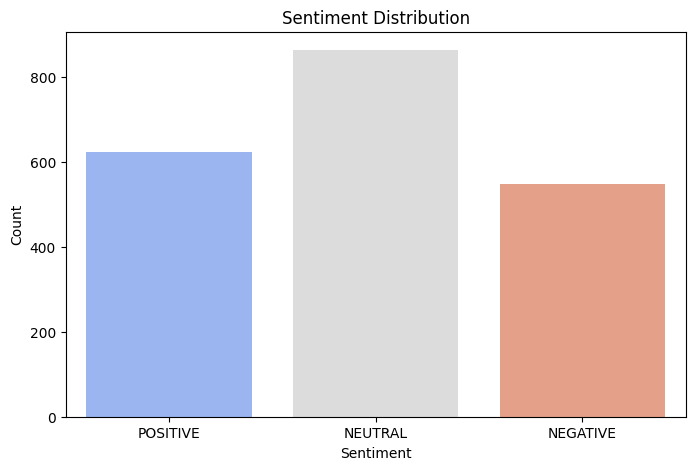


🔥 **Top 5 Positive Posts:**
                                                  title  score  num_comments
695   A lawyer used ChatGPT for legal filing. The ch...  45640          3039
95    A lawyer used ChatGPT for legal filing. The ch...  45638          3039
2654  A lawyer used ChatGPT for legal filing. The ch...  45637          3039
1675  A lawyer used ChatGPT for legal filing. The ch...  45636          3039
295   A lawyer used ChatGPT for legal filing. The ch...  45634          3039

🚨 **Top 5 Negative Posts:**
                                                  title  score  num_comments
966   Claude's censorship is WAYY too much. "AI Safe...      0           151
1946  Claude's censorship is WAYY too much. "AI Safe...      0           151
2925  Claude's censorship is WAYY too much. "AI Safe...      0           151
2281  Google Gemini released for iPhone and I am sor...     24            60
1301  Google Gemini released for iPhone and I am sor...     25            60


<ipython-input-17-4e804c653555>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="final_sentiment", y="score", data=df, palette="coolwarm", order=["POSITIVE", "NEUTRAL", "NEGATIVE"])


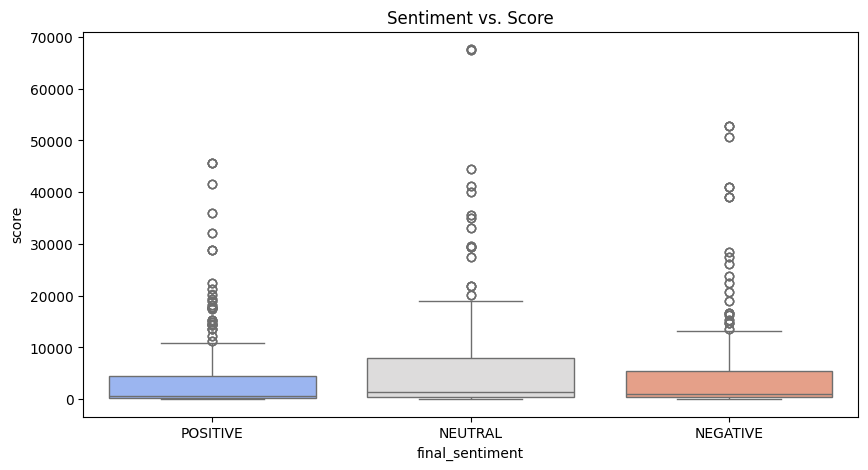

<ipython-input-17-4e804c653555>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="final_sentiment", y="num_comments", data=df, palette="coolwarm", order=["POSITIVE", "NEUTRAL", "NEGATIVE"])


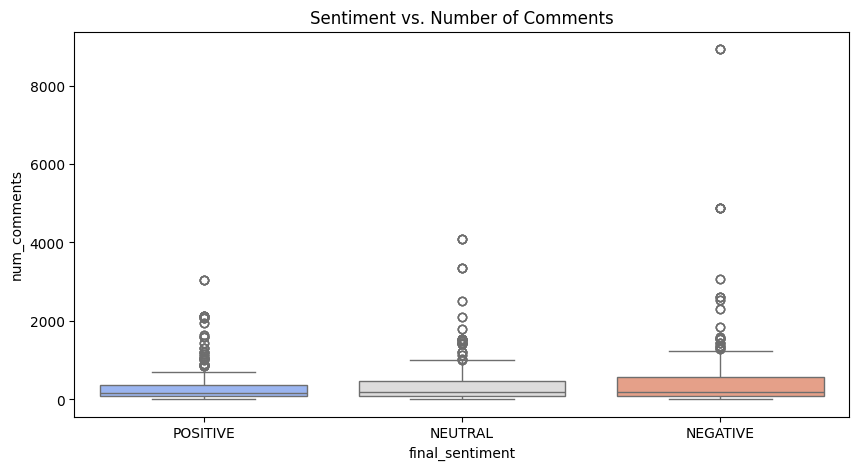

<Figure size 1200x600 with 0 Axes>

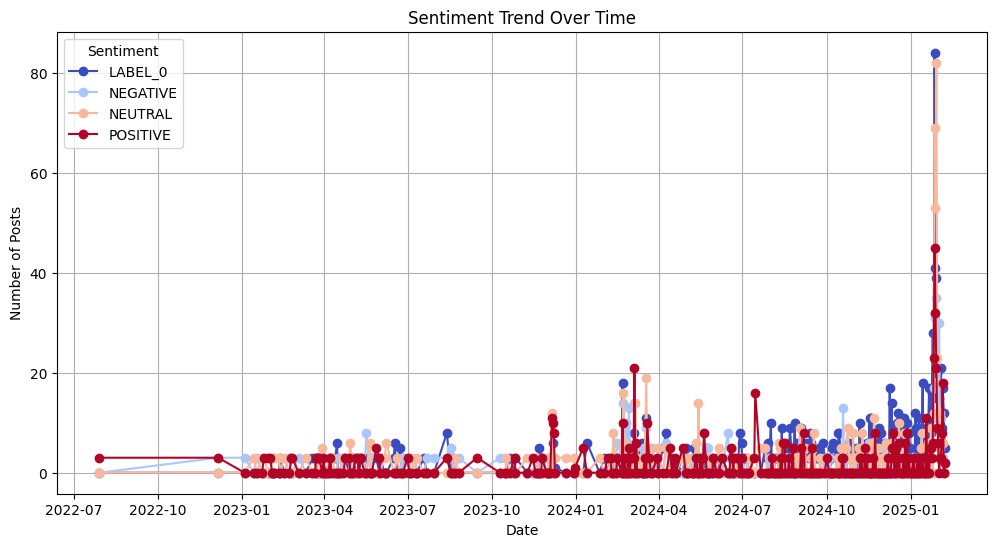

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv("sentiment_results.csv")

# Convert created_utc to readable time
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")

### 1️⃣ SENTIMENT DISTRIBUTION
plt.figure(figsize=(8, 5))
sns.countplot(x="final_sentiment", data=df, palette="coolwarm", order=["POSITIVE", "NEUTRAL", "NEGATIVE"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

### 2️⃣ TOP POSITIVE & NEGATIVE POSTS
top_positive = df[df["final_sentiment"] == "POSITIVE"].nlargest(5, "score")[["title", "score", "num_comments"]]
top_negative = df[df["final_sentiment"] == "NEGATIVE"].nsmallest(5, "score")[["title", "score", "num_comments"]]

print("\n🔥 **Top 5 Positive Posts:**")
print(top_positive)

print("\n🚨 **Top 5 Negative Posts:**")
print(top_negative)

### 3️⃣ SENTIMENT VS SCORE & COMMENTS
plt.figure(figsize=(10, 5))
sns.boxplot(x="final_sentiment", y="score", data=df, palette="coolwarm", order=["POSITIVE", "NEUTRAL", "NEGATIVE"])
plt.title("Sentiment vs. Score")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="final_sentiment", y="num_comments", data=df, palette="coolwarm", order=["POSITIVE", "NEUTRAL", "NEGATIVE"])
plt.title("Sentiment vs. Number of Comments")
plt.show()

### 4️⃣ TIME-BASED SENTIMENT TREND
df["date"] = df["created_utc"].dt.date
sentiment_trend = df.groupby(["date", "final_sentiment"]).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sentiment_trend.plot(kind="line", marker="o", figsize=(12, 6), colormap="coolwarm")
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()


<ipython-input-18-6c9d676bff75>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="final_sentiment", data=df, palette="coolwarm", order=["POSITIVE", "NEUTRAL", "NEGATIVE"])


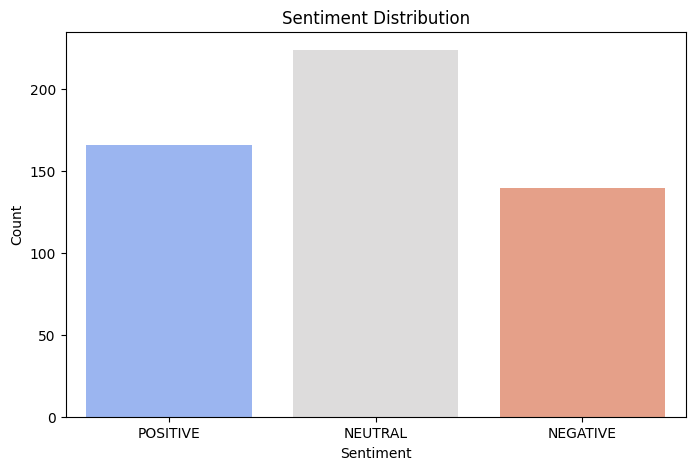

<ipython-input-18-6c9d676bff75>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="final_sentiment", y="score", data=df, palette="coolwarm", order=["POSITIVE", "NEUTRAL", "NEGATIVE"])



🔥 **Top 5 Positive Posts:**
                                                 title  score  num_comments
95   A lawyer used ChatGPT for legal filing. The ch...  45638          3039
711  Study finds ChatGPT outperforms physicians in ...  41576          1629
768                Well that escalated quickly ChatGPT  35996           607
726  Thank you ChatGPT for exposing the banality of...  32133          1942
66   I Asked ChatGPT to generate memes it thought w...  28892          2072

🚨 **Top 5 Negative Posts:**
                                                  title  score  num_comments
966   Claude's censorship is WAYY too much. "AI Safe...      0           151
1301  Google Gemini released for iPhone and I am sor...     25            60
1045  This is the result of asking ClaudeAI to make ...     26            23
1016  Cancelled my ChatGPT plus subscription as well...     43           106
1086  New Error Message? Never seen this before, hap...     43            38


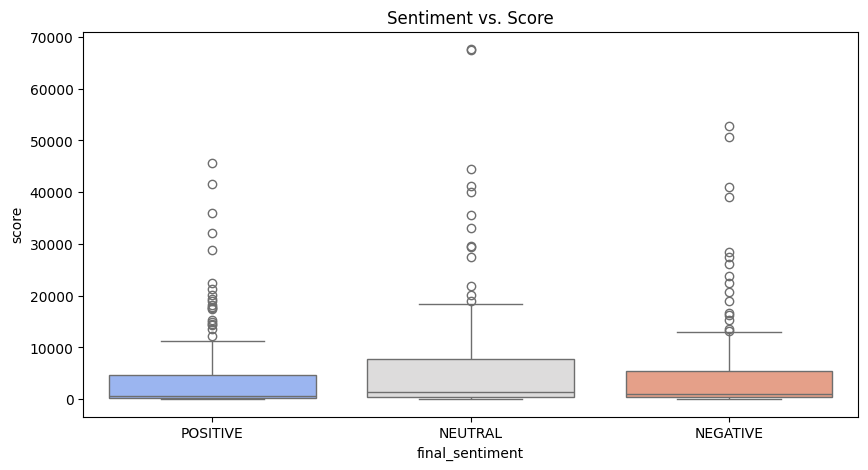

<ipython-input-18-6c9d676bff75>:39: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="final_sentiment", y="num_comments", data=df, palette="coolwarm", order=["POSITIVE", "NEUTRAL", "NEGATIVE"])


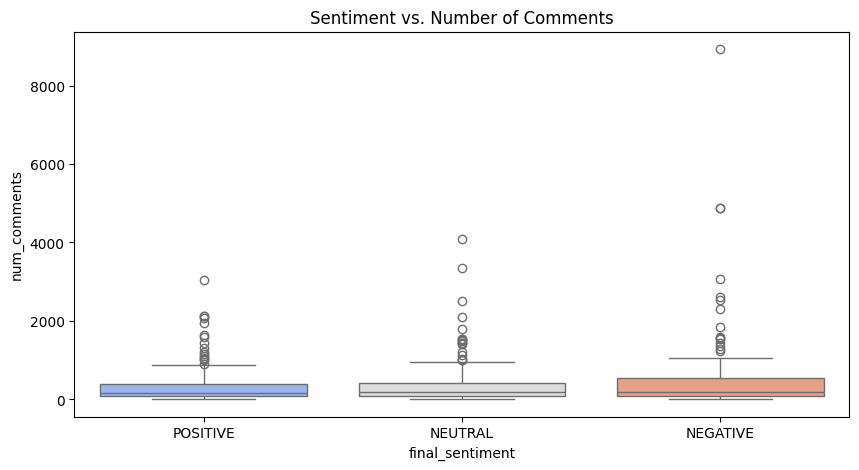

<Figure size 1200x600 with 0 Axes>

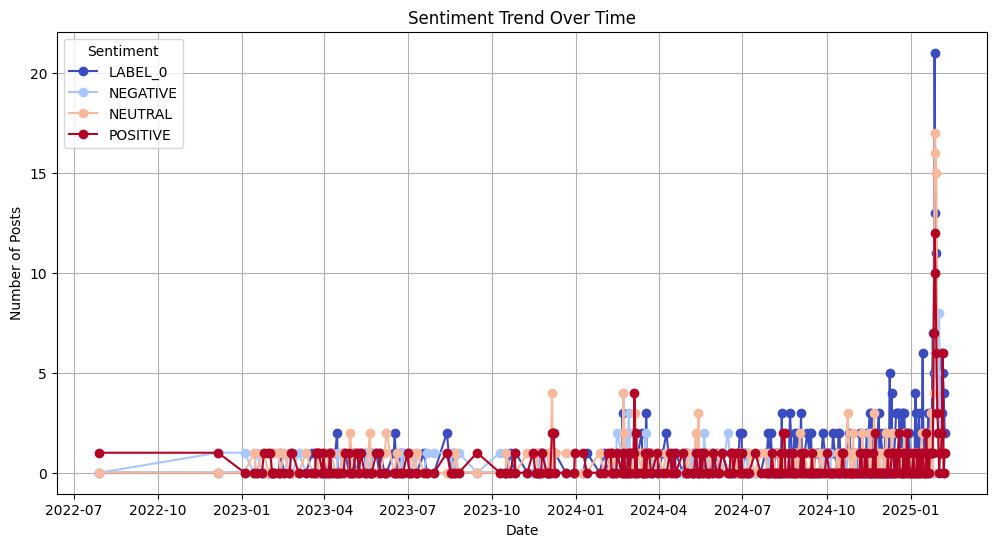

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data
df = pd.read_csv("sentiment_results.csv")

# Remove Duplicates
df = df.drop_duplicates(subset=["title", "selftext"], keep="first")

# Convert created_utc to readable time
df["created_utc"] = pd.to_datetime(df["created_utc"], unit="s")

### 1️⃣ SENTIMENT DISTRIBUTION (AFTER CLEANING)
plt.figure(figsize=(8, 5))
sns.countplot(x="final_sentiment", data=df, palette="coolwarm", order=["POSITIVE", "NEUTRAL", "NEGATIVE"])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

### 2️⃣ TOP POSITIVE & NEGATIVE POSTS
top_positive = df[df["final_sentiment"] == "POSITIVE"].nlargest(5, "score")[["title", "score", "num_comments"]]
top_negative = df[df["final_sentiment"] == "NEGATIVE"].nsmallest(5, "score")[["title", "score", "num_comments"]]

print("\n🔥 **Top 5 Positive Posts:**")
print(top_positive)

print("\n🚨 **Top 5 Negative Posts:**")
print(top_negative)

### 3️⃣ SENTIMENT VS SCORE & COMMENTS
plt.figure(figsize=(10, 5))
sns.boxplot(x="final_sentiment", y="score", data=df, palette="coolwarm", order=["POSITIVE", "NEUTRAL", "NEGATIVE"])
plt.title("Sentiment vs. Score")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x="final_sentiment", y="num_comments", data=df, palette="coolwarm", order=["POSITIVE", "NEUTRAL", "NEGATIVE"])
plt.title("Sentiment vs. Number of Comments")
plt.show()

### 4️⃣ TIME-BASED SENTIMENT TREND
df["date"] = df["created_utc"].dt.date
sentiment_trend = df.groupby(["date", "final_sentiment"]).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
sentiment_trend.plot(kind="line", marker="o", figsize=(12, 6), colormap="coolwarm")
plt.title("Sentiment Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Posts")
plt.legend(title="Sentiment")
plt.grid(True)
plt.show()


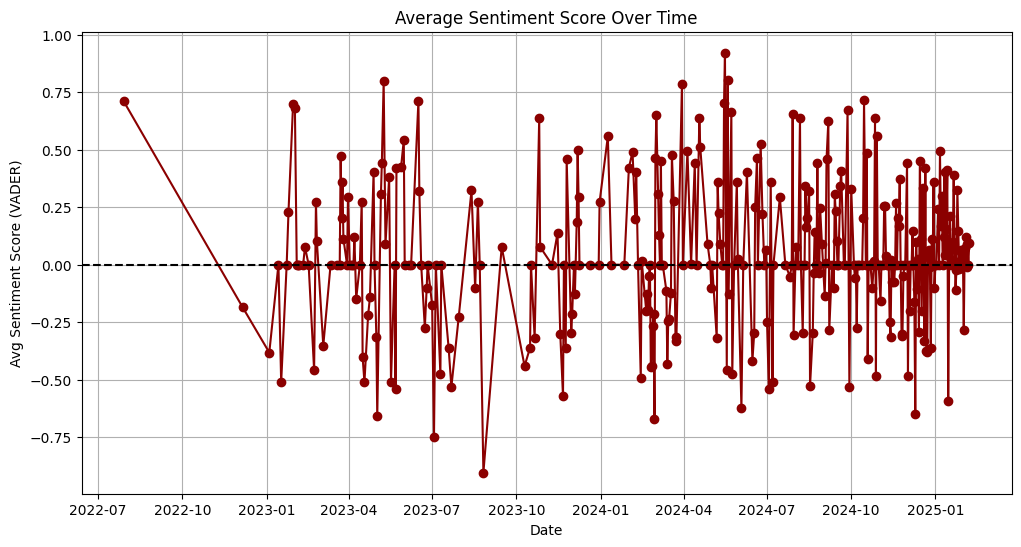

In [19]:
df["date"] = df["created_utc"].dt.date
df["sentiment_score"] = df["vader_sentiment"]  # Numeric sentiment (-1 to 1)

sentiment_trend = df.groupby("date")["sentiment_score"].mean()

plt.figure(figsize=(12, 6))
sentiment_trend.plot(marker="o", color="darkred", linestyle="-")
plt.title("Average Sentiment Score Over Time")
plt.xlabel("Date")
plt.ylabel("Avg Sentiment Score (VADER)")
plt.axhline(0, color="black", linestyle="--")  # Neutral line
plt.grid(True)
plt.show()


Here are some **unique and deeper insights** you can extract from your sentiment data:  

---

### **1️⃣ Sentiment Polarity Shift Over Time**  
**(Are people becoming more positive/negative over time?)**
```python
df["date"] = df["created_utc"].dt.date
df["sentiment_score"] = df["vader_sentiment"]  # Numeric sentiment (-1 to 1)

sentiment_trend = df.groupby("date")["sentiment_score"].mean()

plt.figure(figsize=(12, 6))
sentiment_trend.plot(marker="o", color="darkred", linestyle="-")
plt.title("Average Sentiment Score Over Time")
plt.xlabel("Date")
plt.ylabel("Avg Sentiment Score (VADER)")
plt.axhline(0, color="black", linestyle="--")  # Neutral line
plt.grid(True)
plt.show()
```
📌 **Insight:** See if people are becoming more **positive or negative over time**.

---

### **2️⃣ Word Cloud for Most Common Words in Each Sentiment**  
**(What words appear the most in positive vs. negative posts?)**
```python
from wordcloud import WordCloud

for sentiment in ["POSITIVE", "NEGATIVE"]:
    text = " ".join(df[df["final_sentiment"] == sentiment]["title"])
    wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Most Common Words in {sentiment} Posts")
    plt.axis("off")
    plt.show()
```
📌 **Insight:** Identify key themes in **positive vs. negative** discussions.

---

### **3️⃣ Are Highly Upvoted Posts More Positive?**  
**(Does higher upvote score mean more positivity?)**
```python
plt.figure(figsize=(10, 5))
sns.scatterplot(x="score", y="vader_sentiment", hue="final_sentiment", palette="coolwarm", alpha=0.7)
plt.title("Post Score vs. Sentiment")
plt.xlabel("Post Score")
plt.ylabel("VADER Sentiment Score")
plt.axhline(0, color="black", linestyle="--")  # Neutral line
plt.show()
```
📌 **Insight:** Do **highly upvoted posts** tend to be **positive or negative?**  

---

### **4️⃣ Do Controversial Posts Have More Comments?**  
**(Are neutral/mixed sentiment posts driving more discussion?)**
```python
plt.figure(figsize=(10, 5))
sns.boxplot(x="final_sentiment", y="num_comments", data=df, palette="coolwarm")
plt.title("Sentiment vs. Number of Comments")
plt.show()
```
📌 **Insight:** Does **neutral sentiment** spark more **discussions**?  

---

### **5️⃣ Most Common AI/Tech Keywords in Each Sentiment**  
**(Which AI tools or tech terms are talked about positively/negatively?)**
```python
tech_terms = ["Claude", "ChatGPT", "GPT-4", "AI", "Llama", "Cursor", "Gemini", "Anthropic", "OpenAI"]

for term in tech_terms:
    df[term] = df["title"].str.contains(term, case=False, na=False)

sentiment_counts = df.groupby("final_sentiment")[tech_terms].sum().T
sentiment_counts.plot(kind="bar", figsize=(12, 6), colormap="coolwarm")
plt.title("Mentions of AI Terms Across Sentiments")
plt.xlabel("Tech Term")
plt.ylabel("Count")
plt.show()
```
📌 **Insight:** See **which AI tools are talked about positively or negatively**.

---

### **🚀 Why This is Unique?**  
✅ **Polarity shift** shows **if sentiment is changing over time**  
✅ **Word cloud** helps **visually identify themes**  
✅ **Score-Sentiment** analysis shows **if upvotes are linked to positivity**  
✅ **Comment analysis** shows **which sentiment gets the most engagement**  
✅ **AI/Tech mentions** highlight **which tools are well-received or criticized**  

These will give **deeper, data-driven insights**! 🚀

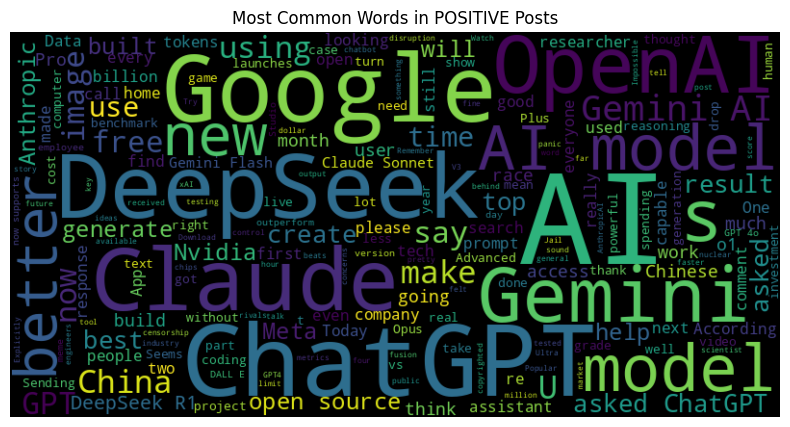

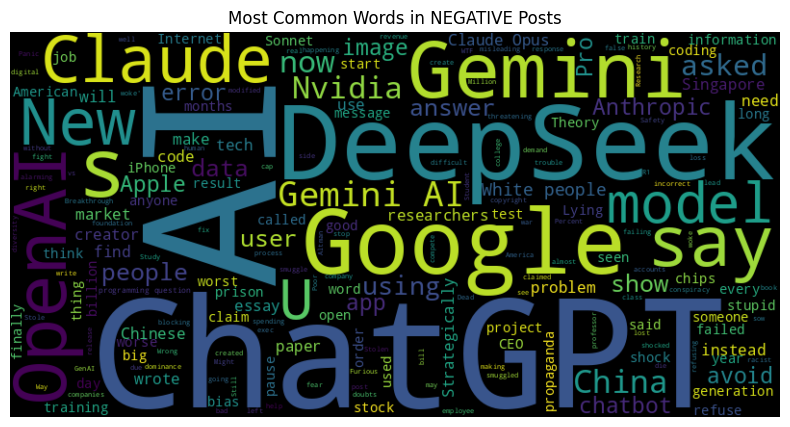

In [21]:
from wordcloud import WordCloud

for sentiment in ["POSITIVE", "NEGATIVE"]:
    text = " ".join(df[df["final_sentiment"] == sentiment]["title"])
    wordcloud = WordCloud(width=800, height=400, background_color="black").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Most Common Words in {sentiment} Posts")
    plt.axis("off")
    plt.show()

In [24]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.scatterplot(x="score", y="vader_sentiment", hue="final_sentiment", palette="coolwarm", alpha=0.7)
plt.title("Post Score vs. Sentiment")
plt.xlabel("Post Score")
plt.ylabel("VADER Sentiment Score")
plt.axhline(0, color="black", linestyle="--")  # Neutral line
plt.show()

ValueError: Could not interpret value `score` for `x`. Value is a string, but `data` was not passed.

<Figure size 1000x500 with 0 Axes>

I'll give you four separate Colab-ready Python scripts for each visualization. You can pick and run any of them. These use **Matplotlib, Seaborn, and WordCloud** for stunning results.

---

## **1️⃣ Sentiment Heatmap (Majestic & Intuitive)**  
🔥 *A heatmap of sentiment trends over time.*  

```python
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load Data
data = pd.read_csv("sentiment_results.csv")

# Convert timestamp to datetime
data["created_utc"] = pd.to_datetime(data["created_utc"], unit="s")

# Group by month and calculate average sentiment
data["month"] = data["created_utc"].dt.to_period("M")
heatmap_data = data.groupby("month")["vader_sentiment"].mean().unstack()

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data.values.reshape(-1, 1), cmap="RdYlGn", annot=True, fmt=".2f",
    linewidths=0.5, cbar_kws={'label': 'Avg Sentiment Score'}
)
plt.title("Sentiment Heatmap Over Time")
plt.xlabel("Month")
plt.xticks(ticks=np.arange(len(heatmap_data.index)), labels=heatmap_data.index, rotation=45)
plt.show()
```

---

## **2️⃣ Smart Word Clouds (Positive & Negative)**  
🔥 *See what words dominate positive vs. negative discussions.*  

```python
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

# Load Data
data = pd.read_csv("sentiment_results.csv")

# Split positive and negative text
positive_text = " ".join(data[data["final_sentiment"] == "POSITIVE"]["title"].dropna())
negative_text = " ".join(data[data["final_sentiment"] == "NEGATIVE"]["title"].dropna())

# Generate Word Clouds
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

wordcloud_pos = WordCloud(width=600, height=400, background_color="black", colormap="Greens").generate(positive_text)
wordcloud_neg = WordCloud(width=600, height=400, background_color="black", colormap="Reds").generate(negative_text)

ax[0].imshow(wordcloud_pos, interpolation="bilinear")
ax[0].set_title("Positive Sentiment Word Cloud", fontsize=14, color="green")
ax[0].axis("off")

ax[1].imshow(wordcloud_neg, interpolation="bilinear")
ax[1].set_title("Negative Sentiment Word Cloud", fontsize=14, color="red")
ax[1].axis("off")

plt.tight_layout()
plt.show()
```

---

## **3️⃣ Sentiment River Plot (Wave Effect Over Time)**  
🔥 *Aesthetic streamplot showing sentiment over time.*  

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load Data
data = pd.read_csv("sentiment_results.csv")
data["created_utc"] = pd.to_datetime(data["created_utc"], unit="s")

# Aggregate sentiment counts per month
data["month"] = data["created_utc"].dt.to_period("M")
sentiment_counts = data.groupby(["month", "final_sentiment"]).size().unstack(fill_value=0)

# Normalize values to create smooth waves
sentiment_counts = sentiment_counts / sentiment_counts.sum(axis=1)[:, None]

# Generate X and Y values
months = np.arange(len(sentiment_counts.index))
pos_y = sentiment_counts["POSITIVE"].cumsum()
neg_y = -sentiment_counts["NEGATIVE"].cumsum()
neu_y = pos_y - sentiment_counts["NEUTRAL"]

# Plot Stream Graph
plt.figure(figsize=(12, 6))
plt.fill_between(months, 0, pos_y, color="green", alpha=0.6, label="Positive")
plt.fill_between(months, 0, neu_y, color="gold", alpha=0.6, label="Neutral")
plt.fill_between(months, 0, neg_y, color="red", alpha=0.6, label="Negative")

plt.xticks(months, sentiment_counts.index, rotation=45)
plt.title("Sentiment Trends Over Time (Streamplot)")
plt.xlabel("Month")
plt.ylabel("Cumulative Sentiment Distribution")
plt.legend()
plt.show()
```

---

## **4️⃣ Engagement vs. Sentiment Bubble Chart**  
🔥 *Understand if sentiment drives comments and upvotes.*  

```python
import pandas as pd
import matplotlib.pyplot as plt

# Load Data
data = pd.read_csv("sentiment_results.csv")

# Define Bubble Chart
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    data["vader_sentiment"], data["num_comments"],
    s=data["score"], alpha=0.6, c=data["vader_sentiment"], cmap="coolwarm", edgecolors="black"
)

plt.colorbar(label="Sentiment Score")
plt.axhline(y=data["num_comments"].mean(), color="gray", linestyle="--", label="Avg Comments")
plt.axvline(x=0, color="black", linestyle="--")  # Neutral sentiment line
plt.xlabel("Sentiment Score (VADER)")
plt.ylabel("Number of Comments")
plt.title("Engagement vs. Sentiment Bubble Chart")
plt.legend()
plt.show()
```

---

## **🔥 Next Steps?**
- Try running these one by one and let me know if you want **tweaks or enhancements.**  
- If you want **a single dashboard with multiple visuals**, I can make it in **Plotly or Streamlit.**

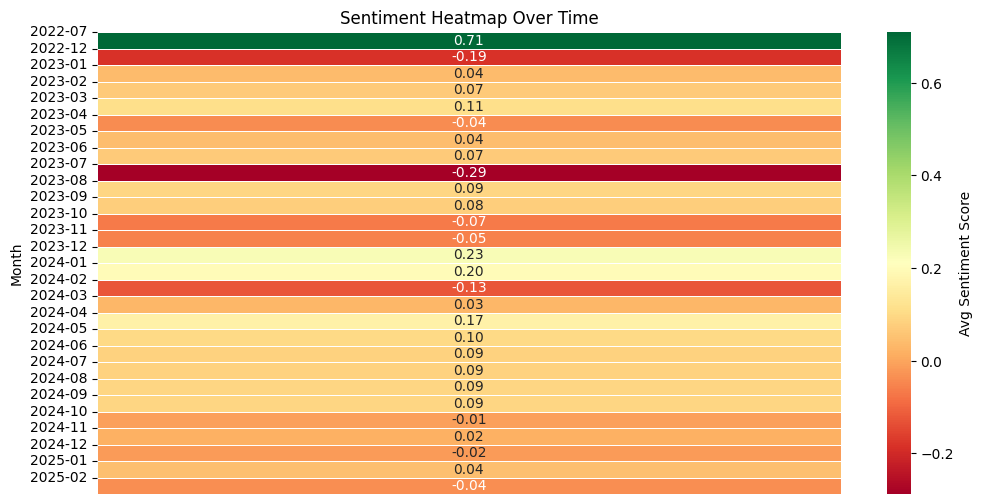

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
data = pd.read_csv("sentiment_results.csv")

# Convert timestamp to datetime
data["created_utc"] = pd.to_datetime(data["created_utc"], unit="s")

# Group by month and calculate average sentiment
data["month"] = data["created_utc"].dt.to_period("M")
heatmap_data = data.groupby("month")["vader_sentiment"].mean()

# Convert PeriodIndex to string for plotting
heatmap_data.index = heatmap_data.index.astype(str)

# Plot Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(
    heatmap_data.values.reshape(-1, 1), cmap="RdYlGn", annot=True, fmt=".2f",
    linewidths=0.5, cbar_kws={'label': 'Avg Sentiment Score'}
)

plt.xticks(ticks=[], labels=[])  # Hide x-axis labels for a clean look
plt.yticks(ticks=range(len(heatmap_data.index)), labels=heatmap_data.index, rotation=0)
plt.title("Sentiment Heatmap Over Time")
plt.ylabel("Month")
plt.show()


In [27]:
!pip install bertopic sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.7/143.7 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 107.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/105 [00:00<?, ?it/s]

Topic Info:
   Topic  Count                             Name  \
0     -1    275        -1_rtx_dlss_geforce_frame   
1      0     55              0_pra_openai_de_per   
2      1     44       1_gemini_rumble_royal_knew   
3      2     42  2_google_gemini_googles_forcing   
4      3     39     3_prompts_samir_hero_library   

                                      Representation  \
0  [rtx, dlss, geforce, frame, nvidia, generation...   
1  [pra, openai, de, per, que, che, deepseek, ha,...   
2  [gemini, rumble, royal, knew, responsive, incr...   
3  [google, gemini, googles, forcing, disable, fi...   
4  [prompts, samir, hero, library, page, jobs, pr...   

                                 Representative_Docs  
0  [[Megathread] GeForce at CES 2025 - GeForce RT...  
1  [Unpopular Opinion: Deepseek has rat-effed Ope...  
2  [Gemini is most responsive AI I ever used to t...  
3  [Public AI (Gemini, ChatGPT) have too many gua...  
4  [Ultimate Guide for Building a Startup with Ch...  



Sentiment Distribution per Topic:
final_sentiment  LABEL_0  NEGATIVE  NEUTRAL  POSITIVE
topic                                                
-1                   103        53       69        50
 0                    28         9       17         1
 1                    12        13       14         5
 2                    14        11        0        17
 3                    33         0        0         6
...                  ...       ...      ...       ...
 150                   8         0        3         0
 151                  11         0        0         0
 152                   0         3        8         0
 153                   0         3        5         3
 154                   0         6        5         0

[156 rows x 4 columns]


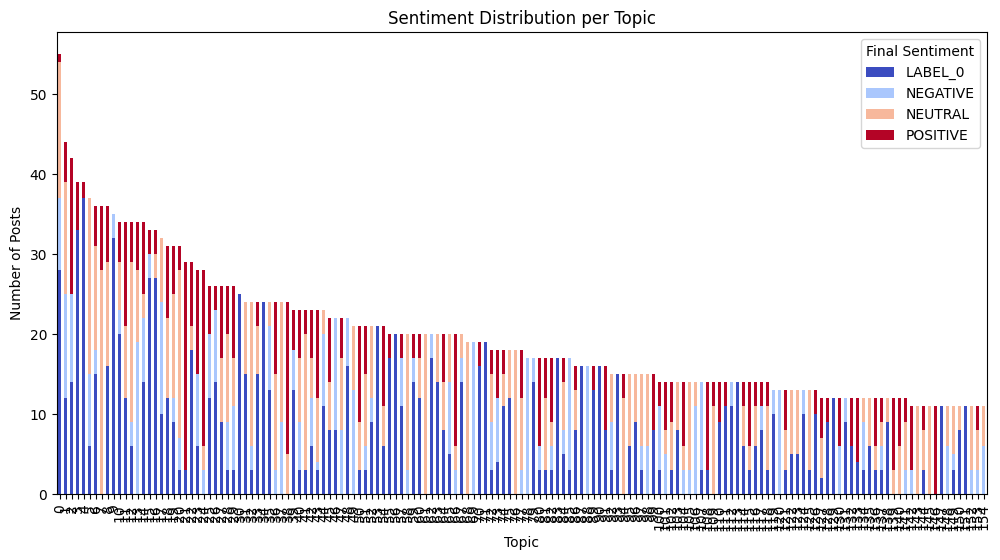

In [28]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

# Load the results CSV
df = pd.read_csv("sentiment_results.csv")

# Combine title and selftext to form a richer text column
df['text'] = df['title'].fillna('') + ". " + df['selftext'].fillna('')

# Use a transformer model to generate embeddings (fast and effective)
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")
embeddings = embedding_model.encode(df['text'], show_progress_bar=True)

# Create and fit the BERTopic model to extract topics from your posts
topic_model = BERTopic(embedding_model=embedding_model, language="english")
topics, probs = topic_model.fit_transform(df['text'], embeddings)

# Add the topic labels to your dataframe
df['topic'] = topics

# Show topic information (each topic's top terms)
topics_info = topic_model.get_topic_info()
print("Topic Info:")
print(topics_info.head())

# Visualize the top 10 topics (a majestic bar chart)
fig = topic_model.visualize_barchart(top_n_topics=10)
fig.show()

# Now, let’s generate an insight: Sentiment distribution per topic.
# We'll use the 'final_sentiment' field (e.g., NEGATIVE, NEUTRAL, POSITIVE)
sentiment_topic = df.groupby(['topic', 'final_sentiment']).size().unstack(fill_value=0)
print("\nSentiment Distribution per Topic:")
print(sentiment_topic)

# Plot a stacked bar chart for sentiment breakdown by topic (ignoring outliers, i.e., topic -1)
sentiment_topic_clean = sentiment_topic.loc[sentiment_topic.index != -1]
sentiment_topic_clean.plot(kind='bar', stacked=True, figsize=(12,6), colormap="coolwarm")
plt.title("Sentiment Distribution per Topic")
plt.xlabel("Topic")
plt.ylabel("Number of Posts")
plt.legend(title="Final Sentiment")
plt.show()

# Optional: Visualize topics in 2D (UMAP projection) for an interactive dashboard
# Uncomment the next two lines if you want an interactive visualization.
# fig_umap = topic_model.visualize_topics()
# fig_umap.show()

In [29]:
!pip install scikit-learn seaborn

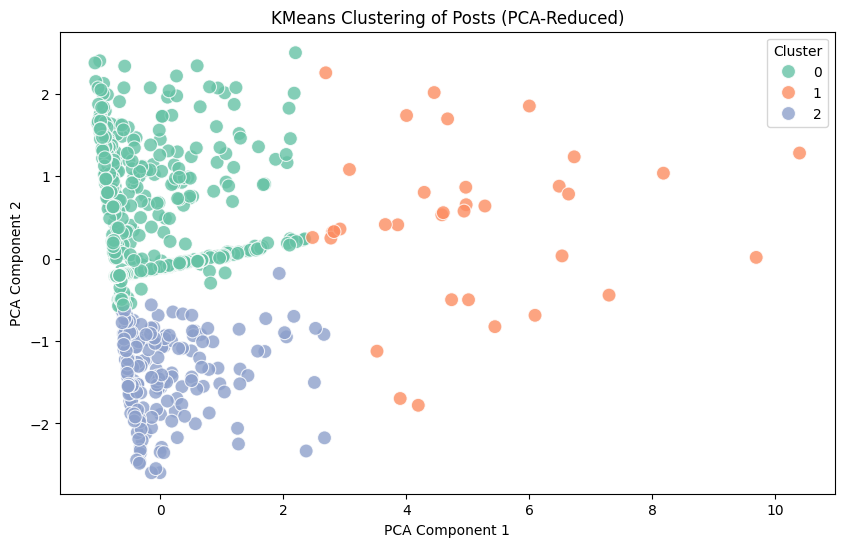

Cluster Centers (Original Scale):
          score  num_comments  vader_sentiment
0   2679.958641    278.153619         0.180569
1  32481.685714   2477.428571        -0.064809
2   2624.492228    320.010363        -0.447559

Sentiment Distribution per Cluster (Proportions):
final_sentiment   LABEL_0  NEGATIVE   NEUTRAL  POSITIVE
cluster                                                
0                0.432792  0.016248  0.314623  0.236337
1                0.228571  0.285714  0.314286  0.171429
2                0.383420  0.616580  0.000000  0.000000


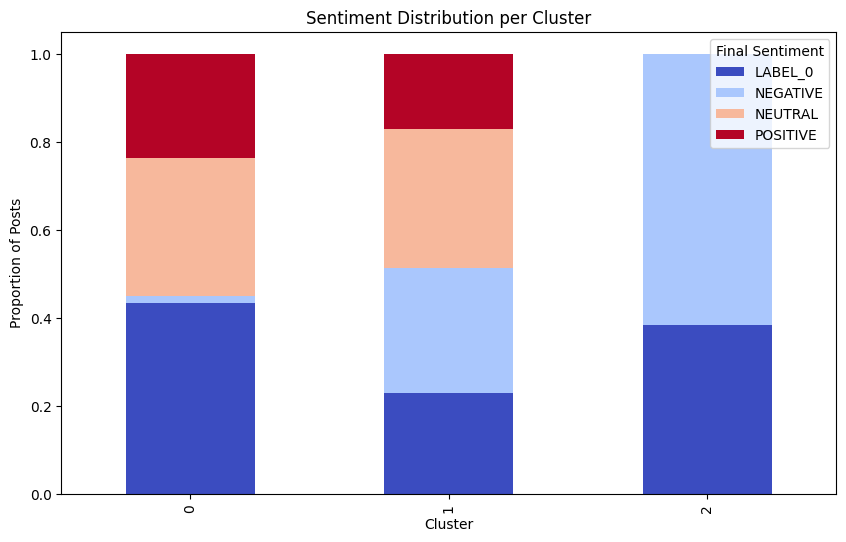

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load your results CSV
df = pd.read_csv("sentiment_results.csv")

# Remove duplicate posts (using title & selftext)
df = df.drop_duplicates(subset=["title", "selftext"])

# Select useful numeric features:
#   - score: Upvote score
#   - num_comments: Engagement via comments
#   - vader_sentiment: Numeric sentiment score from VADER (-1 to 1)
features = df[['score', 'num_comments', 'vader_sentiment']].copy()
features.fillna(0, inplace=True)

# Normalize the features to bring them to comparable scale
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Use PCA to reduce the features to 2 dimensions (for visualization)
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Choose a number of clusters (try k=3 to start)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

# Add the cluster labels back to the dataframe
df['cluster'] = clusters

# Plot the clusters using the 2D PCA representation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1],
                hue=clusters, palette='Set2', s=100, alpha=0.8)
plt.title("KMeans Clustering of Posts (PCA-Reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

# Inverse-transform the cluster centers to the original feature scale
cluster_centers_scaled = kmeans.cluster_centers_
cluster_centers = scaler.inverse_transform(cluster_centers_scaled)
centers_df = pd.DataFrame(cluster_centers, columns=['score', 'num_comments', 'vader_sentiment'])
print("Cluster Centers (Original Scale):")
print(centers_df)

# Now, let's inspect sentiment distributions per cluster.
# Here, we use the 'final_sentiment' column (categorical: POSITIVE, NEGATIVE, NEUTRAL)
sentiment_by_cluster = df.groupby('cluster')['final_sentiment'].value_counts(normalize=True).unstack().fillna(0)
print("\nSentiment Distribution per Cluster (Proportions):")
print(sentiment_by_cluster)

# Plot a stacked bar chart for the sentiment distribution per cluster
sentiment_by_cluster.plot(kind='bar', stacked=True, colormap='coolwarm', figsize=(10, 6))
plt.title("Sentiment Distribution per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Proportion of Posts")
plt.legend(title="Final Sentiment")
plt.show()